Click this button to run in Colab.
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ssuai/deep_learning_from_scratch/blob/master/ch03/neural_network.ipynb)

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os

In [2]:
# some helper functions
def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

def download_weight():
    import requests

    url = "https://github.com/ssuai/deep_learning_from_scratch/raw/refs/heads/master/ch03/sample_weight.pkl"
    weight_path = "weight.pkl"  # weight 파일명

    response = requests.get(url)
    if response.status_code == 200:
        with open(weight_path, "wb") as f:
            f.write(response.content)
        print(f"File downloaded successfully: {output_path}")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")
        
if is_colab():
    print('Downloading weights...')
    download_weight()

In [3]:
# download weight file
weight_path = "weight.pkl"  # weight 파일명
if not os.path.exists(weight_path):
    download_weight()

## 3.2.3 계단 함수의 그래프


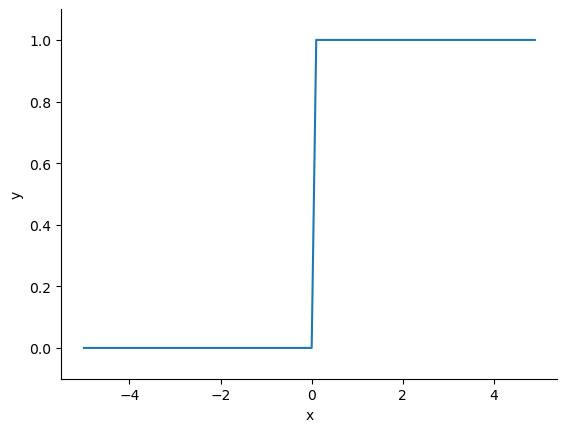

In [4]:
# step_function.py
def step_function(x):
    return np.array(x > 0, dtype=int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)

plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.xlabel('x')
plt.ylabel('y')
sns.despine()

## 3.2.4 시그모이드 함수 구현하기

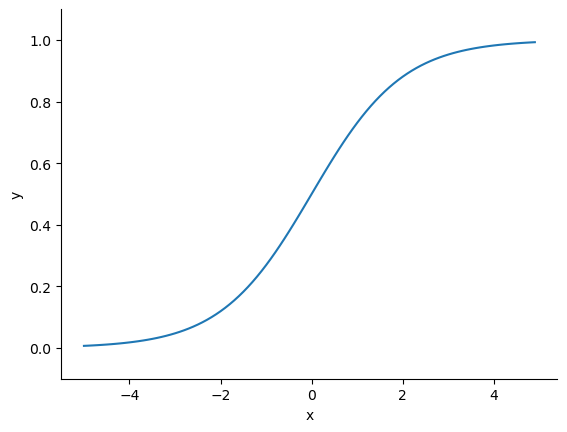

In [5]:
# sigmoid.py
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)

plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.xlabel('x')
plt.ylabel('y')
sns.despine()

## 3.2.5 시그모이드 함수와 계단 함수 비교

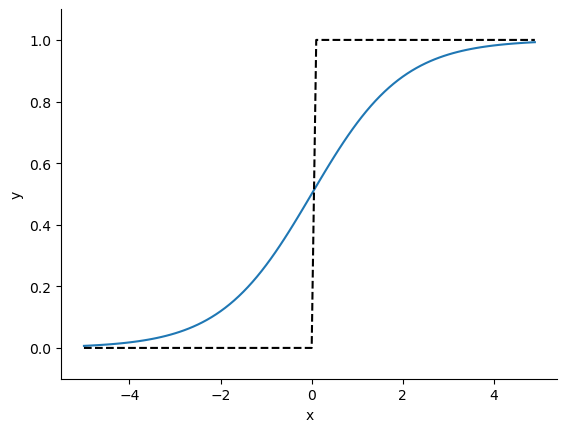

In [6]:
# sig_step_compare.py

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.xlabel('x')
plt.ylabel('y')
sns.despine()

## 3.2.7 ReLU 함수

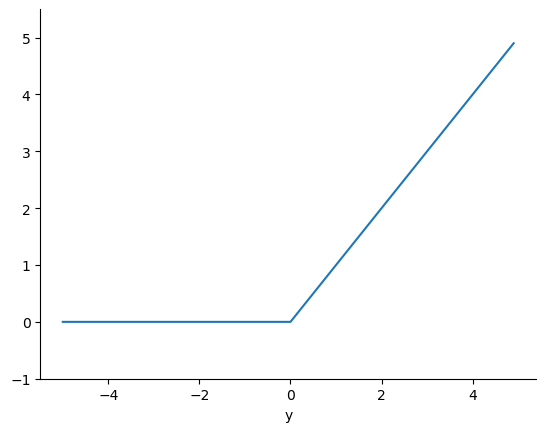

In [7]:
# relu.py
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.xlabel('x')
plt.xlabel('y')
sns.despine()

## 3.4 3층 신경망 구현하기
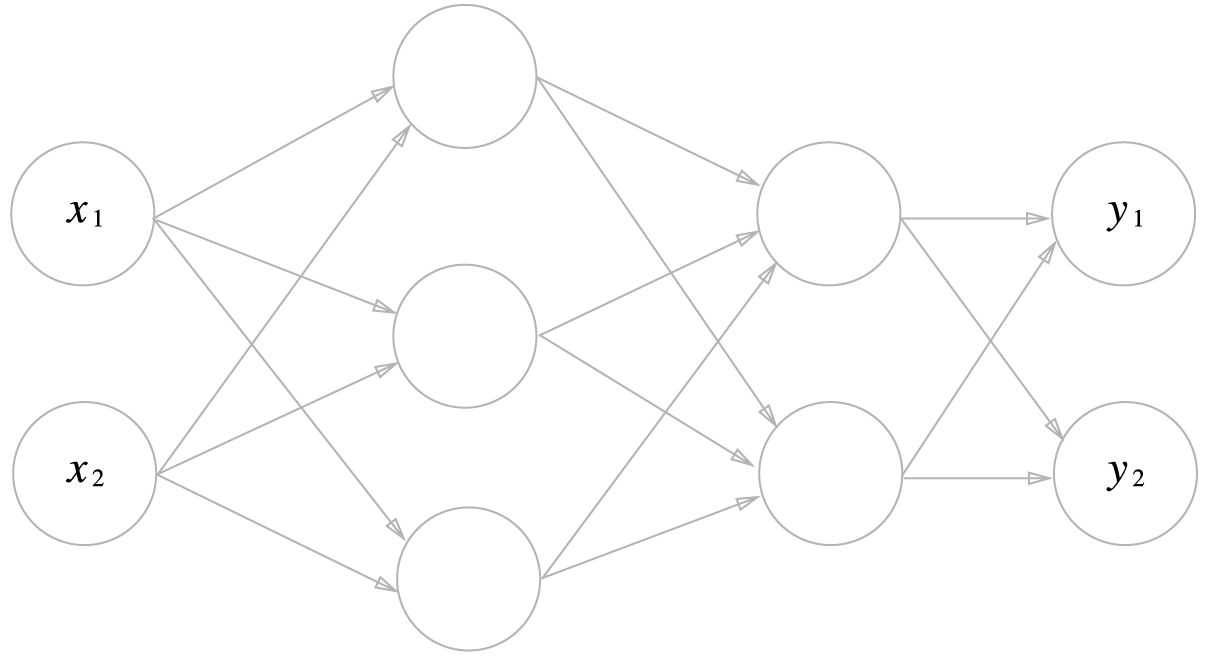

In [8]:
# 입력층 -> 1층
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])

a1 = np.dot(X, W1) + b1     # dimension check: (1x2)(2x3) -> (1x3)
z1 = sigmoid(a1)
print(z1)

[0.57444252 0.66818777 0.75026011]


In [9]:
# 1층 -> 2층
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2 = np.array([0.1, 0.2])

a2 = np.dot(z1, W2) + b2   # dimension check: (1x3)(3x2) -> (1x2) 
z2 = sigmoid(a2)
print(z2)

[0.62624937 0.7710107 ]


In [10]:
# 2층 -> 출력층
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
b3 = np.array([0.1, 0.2])

a3 = np.dot(z2, W3) + b3   # dimension check: (1x2)(2x2) -> (1x2) 
y = a3
print(y)

[0.31682708 0.69627909]


## 3.6.1 손글씨 데이터셋
* http://yann.lecun.com/exdb/mnist/
* a digit ->  a 28x28 image
* 60,000 training images
* 10,000 test images

5
(784,)
(28, 28)


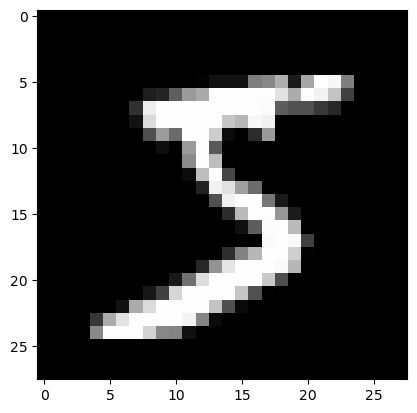

In [11]:
# mnist_show.py
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
# from PIL import Image
# from IPython.display import display # to display images


# def img_show(img):
#     pil_img = Image.fromarray(np.uint8(img))
#     #pil_img.show()
#     display(pil_img)  # display image in a notebook (https://stackoverflow.com/a/50723518)

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

plt.imshow(img, cmap='gray')
# img_show(img)

## 3.6.2 신경망의 추론 처리

In [12]:
# neuralnet_mnist.py
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def init_network():
    with open(weight_path, 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [13]:
network = init_network()
print(network['W1'].shape)
print(network['W2'].shape)
print(network['W3'].shape)

(784, 50)
(50, 100)
(100, 10)


[8.4412488e-05 2.6350631e-06 7.1549421e-04 1.2586256e-03 1.1727954e-06
 4.4990808e-05 1.6269318e-08 9.9706501e-01 9.3744702e-06 8.1831159e-04]
7


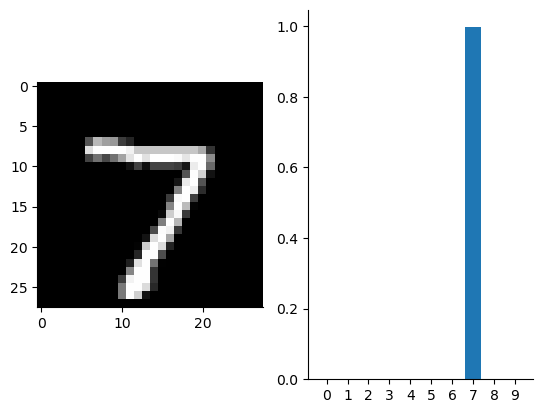

In [14]:
# load data
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)

# predict the 1st sample
y = predict(network, x_test[0])
print(y)
print(t_test[0])


plt.subplot(121)
plt.imshow(x_test[0].reshape(28,28),cmap='gray')

plt.subplot(122)
plt.bar(range(10), y)
plt.xticks(np.arange(10))
sns.despine()

In [15]:
%%time
accuracy_cnt = 0
for i in range(len(x_test)):
    y = predict(network, x_test[i])
    pred = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if pred == t_test[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x_test)))

Accuracy:0.9352
CPU times: user 1.9 s, sys: 116 ms, total: 2.01 s
Wall time: 258 ms


## 3.6.3 배치 처리

In [16]:
%%time
# neuralnet_mnist_batch.py
batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i:i+batch_size]
    y_batch = predict(network, x_batch)
    pred = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(pred == t_test[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x_test)))

Accuracy:0.9352
CPU times: user 358 ms, sys: 44.6 ms, total: 402 ms
Wall time: 54 ms


In [17]:
x_test.shape

(10000, 784)

In [18]:
x_batch.shape, y_batch.shape

((100, 784), (100, 10))

In [19]:
pred.shape

(100,)